# Data Science Mini Project

## Question 1

### Imports & Parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
num_trials = 5000

### A function for simulation of stochastic process of "Point"

In [2]:
def P_calculator(M, N, num_trials, random_seed):
    np.random.seed(seed=random_seed)
    bag = np.ones((M, N), dtype=int)
    for i_row in range(M):
        bag[i_row, :] = (i_row + 1) * bag[i_row, :]
    bag = bag.reshape((1, -1))
    ref_bag = bag.squeeze().tolist()

    P = np.zeros(num_trials)
    for i_trial in range(num_trials):
        bag = ref_bag.copy()
        for i_pop in range(len(bag)):
            rand_ind = np.random.choice(len(bag), 1, replace=False)
            this_out = bag.pop(rand_ind[0])
            if i_pop > 0:
                if this_out == last_out:
                    P[i_trial] += 1
            last_out = this_out

    bin_edges = np.arange(np.min(P), np.max(P) + 2) - 0.5
    bin_centers = np.arange(np.min(P), np.max(P) + 1)
    hist, _ = np.histogram(P, bins=bin_edges)
    plt.figure(figsize=(10,7))
    plt.plot(bin_centers, hist)
    plt.grid(True)
    plt.title('Histogram of Point', fontsize=16)
    plt.xlabel('Point Random Variable', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    return P

### Question 1-1

Mean of P: 24.8996


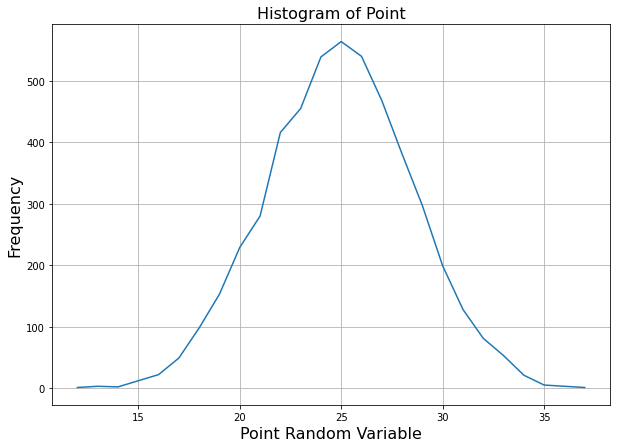

In [3]:
M = 2
N = 26
random_seed = 42
P_2_26 = P_calculator(M, N, num_trials, random_seed)
P_mean = P_2_26.mean()
print('Mean of P:', P_mean)

### Question 1-2

In [4]:
P_std = P_2_26.std()
print('Standard Deviation of P:', P_std)

Standard Deviation of P: 3.571375062913443


### Question 1-3

Mean of P: 50.973


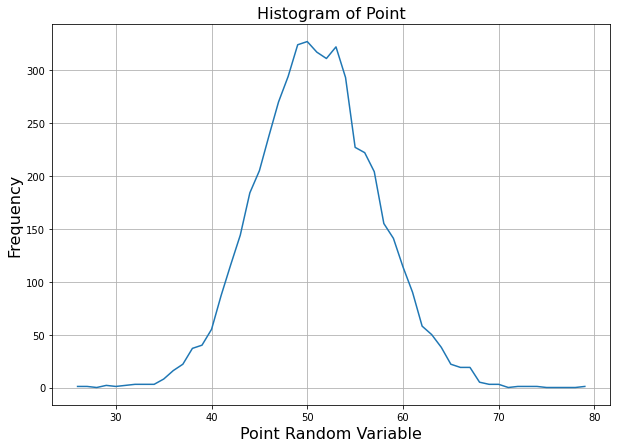

In [5]:
M = 4
N = 52
random_seed = 42
P_4_52 = P_calculator(M, N, num_trials, random_seed)
P_mean = P_4_52.mean()
print('Mean of P:', P_mean)

### Question 1-4

In [6]:
P_std = P_4_52.std()
print('Standard Deviation of P:', P_std)

Standard Deviation of P: 6.142432010205729


### Question 1-5

Pr(A | B) = Pr(A ^ B) / Pr(B)  
^ symbol for Intersection  
Pr((P > 12) ^ (P > 6)) = Pr(P > 6)  
Pr((P > 12) | (P > 6) = Pr(P > 12) / Pr(P > 6)  

In [7]:
Pr_P_more_than_12 = np.sum(P_2_26 > 12)
Pr_P_more_than_6 = np.sum(P_2_26 > 6)
conditional_probability = Pr_P_more_than_12 / Pr_P_more_than_6
print('Conditional Probability:', conditional_probability)

Conditional Probability: 0.9998


### Question 1-6

In [8]:
Pr_P_more_than_12 = np.sum(P_4_52 > 12)
Pr_P_more_than_6 = np.sum(P_4_52 > 6)
conditional_probability = Pr_P_more_than_12 / Pr_P_more_than_6
print('Conditional Probability:', conditional_probability)

Conditional Probability: 1.0
